In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
# from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, MultiTaskElasticNet, MultiTaskLasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, log_loss, accuracy_score
import time
# from sklearn.manifold import TSNE
import joblib


# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
pd.__version__

'0.24.2'

In [3]:
Xtrain = np.load('data/Xtrain.npy')
Xdev = np.load('data/Xdev.npy')
# Xtest = np.load('data_8.21/Xtest.npy')

ytrain = np.load('data/ytrain.npy')
ydev = np.load('data/ydev.npy')
# ytest = np.load('data_8.21/ytest.npy')

In [4]:
rf_results = pd.read_csv('results/rf_results_with_14_estimators.csv')
rf_results

,Dev_mse,data_size
0,1.108396,0.001
1,0.629150,0.002
2,0.561474,0.004
3,0.456059,0.008
4,0.486010,0.016
5,0.433918,0.020
6,0.290724,0.030
7,0.259333,0.040
8,0.154907,0.080
9,0.101245,0.100


In [5]:
knn_results = pd.read_csv('results/knn_results_with_5_neighbors.csv')
knn_results

,Dev_mse,data_size
0,0.853096,0.001
1,0.824338,0.002
2,0.802022,0.004
3,0.782316,0.008
4,0.786907,0.016
5,0.783772,0.020
6,0.783441,0.030
7,0.777841,0.040
8,0.773365,0.080
9,0.744707,0.100


In [11]:
nn_resuls = pd.read_csv('results/nn_results_with_4Layers_128H.csv')
nn_resuls

,Dev_mse,data_size
0,0.638520,0.001
1,0.641886,0.002
2,0.630374,0.004
3,0.623086,0.008
4,0.597791,0.016
5,0.599966,0.020
6,0.519379,0.030
7,0.579430,0.040
8,0.476269,0.080
9,0.449225,0.100


In [7]:
lr_results = pd.read_csv('results_8.21/lr_results_with_diff_trainingsize.csv')
lr_results

,Dev_mse,data_size
0,1.586396e+25,0.001
1,9.595359e+25,0.002
2,7.127947e+25,0.004
3,4.948195e+24,0.008
4,1.619013e+25,0.016
5,8.267683e+24,0.020
6,1.150485e+24,0.030
7,6.118690e+23,0.040
8,2.540414e+24,0.080
9,2.693960e+24,0.100


In [12]:
def plot_performance(df_rf, df_knn, df_nn):

    plt.figure()
    plt.xlabel('Data Size')
    plt.ylabel('Dev set Mean Square Error')
    plt.plot(df_rf['data_size'], df_rf['Dev_mse'],
             label='RF Performamce')
    
    plt.plot(df_knn['data_size'], df_knn['Dev_mse'],
             label='KNN Performamce')
    
    plt.plot(df_nn['data_size'], df_nn['Dev_mse'],
             label='NN Performamce')
    plt.xlim([-0.01,0.22])
    plt.legend()
    plt.savefig('plots/model_comparison_with_diff_datasize.png')
    plt.show()

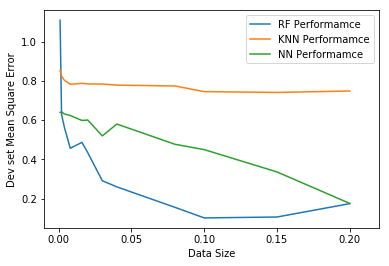

In [13]:
plot_performance(rf_results, knn_results, nn_resuls)

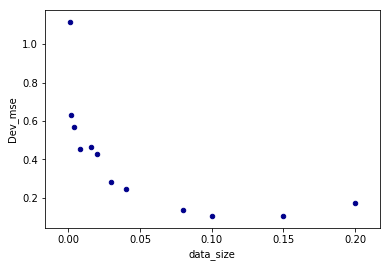

In [10]:
ax1 = rf_results.plot(kind='scatter', 
                      x='data_size',
                      y='Dev_mse',
                      c='DarkBlue')

In [7]:
data_size = [0.001, 0.002, 0.004, 0.008, 0.016, 0.02,
             0.03, 0.04, 0.08, 0.10, 0.15, 0.20
#              ,0.21, 0.22
            ]


In [9]:
## LR model

lr_results = []
full_size = Xtrain.shape[0]
print('full training size is {}'.format(full_size))

for i in data_size[:]:
    results = {}
    
    selected_size = int(full_size * i)
    print('selected training size is {}'.format(selected_size))
    
    Xtrain_selected = Xtrain[:selected_size,:]
    ytrain_selected = ytrain[:selected_size,:]

    model = MultiOutputRegressor(LinearRegression())
    model.fit(Xtrain_selected, ytrain_selected)

    pred_dev = model.predict(Xdev)
    mse_dev = mean_squared_error(ydev, pred_dev)

    results['data_size'] = i
    results['Dev_mse'] = mse_dev

    lr_results.append(results)

lr_df = pd.DataFrame(lr_results)
lr_df.to_csv('results_8.21/lr_results_with_diff_trainingsize.csv', index=False)

full training size is 1372529
selected training size is 1372
selected training size is 2745
selected training size is 5490
selected training size is 10980
selected training size is 21960
selected training size is 27450
selected training size is 41175
selected training size is 54901
selected training size is 109802
selected training size is 137252
selected training size is 205879
selected training size is 274505


In [ ]:
## RF model
## run .py file to get the results

# rf_results = []
# full_size = Xtrain.shape[0]
# print('full training size is {}'.format(full_size))

# for i in data_size[:]:
#     results = {}
    
#     selected_size = int(full_size * i)
#     print('selected training size is {}'.format(selected_size))
    
#     Xtrain_selected = Xtrain[:selected_size,:]
#     ytrain_selected = ytrain[:selected_size,:]

#     model = MultiOutputRegressor(RandomForestRegressor(n_estimators=14, n_jobs=3,
#                                                           max_depth=200,
#                                                           random_state=0))
#     model.fit(Xtrain_selected, ytrain_selected)
#     pred_dev = model.predict(Xdev)
#     mse_dev = mean_squared_error(ydev, pred_dev)
    
#     results['data_size'] = i
#     results['Dev_mse'] = mse_dev
    
#     rf_results.append(results)

# rf_df = pd.DataFrame(rf_results)
# # rf_df.to_csv('results_8.21/rf_results_with_14_estimators')

In [25]:
## KNN model
## run .py file to get the results

knn_results = []
full_size = Xtrain.shape[0]
print('full training size is {}'.format(full_size))
# Xdev = Xdev[:100,:]
# ydev = ydev[:100,:]

for i in data_size[:]:
    t1 = time.time()
    results = {}
    
    selected_size = int(full_size * i)
    print('selected training size is {}'.format(selected_size))
    
    Xtrain_selected = Xtrain[:selected_size,:]
    ytrain_selected = ytrain[:selected_size,:]

    model = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=5, n_jobs=3))
    model.fit(Xtrain_selected, ytrain_selected)
    pred_dev = model.predict(Xdev)
    mse_dev = mean_squared_error(ydev, pred_dev)
    
    results['data_size'] = i
    results['Dev_mse'] = mse_dev
    
    knn_results.append(results)
    
    t2 = time.time()
    print('used time in {} seconds.'.format(t2-t1))

knn_df = pd.DataFrame(knn_results)
# knn_df.to_csv('results_8.21/knn_results_with_5_neighbors')

full training size is 1372529
selected training size is 13
used time in 0.2003798484802246 seconds.
selected training size is 27
used time in 0.2078101634979248 seconds.
selected training size is 54
used time in 0.2982029914855957 seconds.
selected training size is 10980
used time in 17.27768611907959 seconds.
selected training size is 21960
used time in 37.588852405548096 seconds.
selected training size is 27450
used time in 49.92403769493103 seconds.
selected training size is 41175
used time in 90.92969012260437 seconds.
selected training size is 54901
used time in 138.14603185653687 seconds.
selected training size is 109802
used time in 426.3664622306824 seconds.
selected training size is 137252
used time in 637.2464191913605 seconds.


In [22]:
rf_df

,Dev_mse,data_size
0,0.824889,0.00001
1,0.841055,0.00002
2,0.828403,0.00004


In [16]:
knn_df

,Dev_mse,data_size
0,0.824889,0.00001
1,0.841055,0.00002
2,0.828403,0.00004


In [9]:
def hyp_tuning(model_name, Xtrain, ytrain, Xdev, ydev):
    best_results = {}
    best_dev_mse = 1000
    
    for hyp in range(1, 10):
        
        print('='*20)
        print('starting to compute hyp={}'.format(hyp))
        
        if model_name == 'KNN':
            model = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=hyp))
        elif model_name == 'RF':
            model = MultiOutputRegressor(RandomForestRegressor(n_estimators=hyp,
                                                          #max_depth=max_depth,
                                                          random_state=0))
        else:
            raise ValueError('Unknown model_name')                               

        model.fit(Xtrain, ytrain)
        
        pred_train = model.predict(Xtrain)
        mse_train = mean_squared_error(ytrain, pred_train)

        pred_dev = model.predict(Xdev)
        mse_dev = mean_squared_error(ydev, pred_dev)
        
        if mse_dev < best_dev_mse:
            best_dev_mse = mse_dev
            print('Up to now the best dev_mse is {}'.format(best_dev_mse))
            print('and the associated training_mse is {}'.format(mse_train))
            best_results['Dev_mse'] = best_dev_mse
            best_results['Train_mse'] = mse_train
            
            best_model = model
            best_hyp = hyp
            
    save_path = 'results/baseline_{}_with_{}.joblib'.format(model_name, best_hyp)
    joblib.dump(best_model, save_path)
    
    return best_results

In [ ]:
rf_best_model = joblib.load('results/baseline_KNN_with_7.joblib')

In [10]:
knn_best_results = hyp_tuning('KNN', Xtrain, ytrain, Xdev, ydev)

starting to compute hyp=1
Up to now the best dev_mse is 0.10234985476743712
and the associated training_mse is 0.0
starting to compute hyp=2
Up to now the best dev_mse is 0.08465692519429463
and the associated training_mse is 0.42284243542451544
starting to compute hyp=3
starting to compute hyp=4
starting to compute hyp=5
Up to now the best dev_mse is 0.08393667070164451
and the associated training_mse is 1.0140709275467523
starting to compute hyp=6
Up to now the best dev_mse is 0.07278864640279205
and the associated training_mse is 1.0936818186322534
starting to compute hyp=7
Up to now the best dev_mse is 0.06818806633878849
and the associated training_mse is 1.159180766788052
starting to compute hyp=8
starting to compute hyp=9


In [12]:
knn_best_results

{'Dev_mse': 0.06818806633878849, 'Train_mse': 1.159180766788052}

In [13]:
knn_best_model = joblib.load('results/baseline_KNN_with_7.joblib')
pred_test = knn_best_model.predict(Xtest)
mse_test = mean_squared_error(ytest, pred_test)

print('The test_mse of the best KNN model is {}'.format(mse_test))
knn_best_results['Test_mse'] = mse_test

The test_mse of the best KNN model is 0.4914082589694498


In [15]:
rf_best_results = hyp_tuning('RF', Xtrain, ytrain, Xdev, ydev)

starting to compute hyp=1
Up to now the best dev_mse is 12.638849038595891
and the associated training_mse is 0.40183168114755025
starting to compute hyp=2
Up to now the best dev_mse is 3.2075993008254264
and the associated training_mse is 0.4701808003788381
starting to compute hyp=3
starting to compute hyp=4
Up to now the best dev_mse is 3.155231662920647
and the associated training_mse is 0.1241974961462712
starting to compute hyp=5
starting to compute hyp=6
starting to compute hyp=7
starting to compute hyp=8
starting to compute hyp=9


In [16]:
rf_best_results

{'Dev_mse': 3.155231662920647, 'Train_mse': 0.1241974961462712}

In [17]:
rf_best_model = joblib.load('results/baseline_RF_with_4.joblib')
pred_test = rf_best_model.predict(Xtest)
mse_test = mean_squared_error(ytest, pred_test)

print('The test_mse of the best RF model is {}'.format(mse_test))
rf_best_results['Test_mse'] = mse_test

The test_mse of the best RF model is 12.011205353294924


## The Linear Regression Model

In [4]:
regr_multilr = MultiOutputRegressor(LinearRegression())
regr_multilr.fit(Xtrain, ytrain)
# pred_train = regr_multilr.predict(Xtrain)
# mse_train = mean_squared_error(ytrain, pred_train)

pred_dev = regr_multilr.predict(Xdev)
mse_dev = mean_squared_error(ydev, pred_dev)

# pred_test = regr_multilr.predict(Xtest)
# mse_test = mean_squared_error(ytest, pred_test)

# lr_results = {}
# lr_results['Dev_mse'] = mse_dev
# lr_results['Train_mse'] = mse_train
# lr_results['Test_mse'] = mse_test

# joblib.dump(regr_multilr, 'results/baseline_LR.joblib')
print(mse_dev)

0.7145946130515584
